In [1]:
# !/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on 20180510

@author: zhangji
"""

%pylab inline
pylab.rcParams['figure.figsize'] = (18.5, 10.5)

import numpy as np
import pandas as pd
from codeStore import post_support_fun as psf
import os
import glob
from matplotlib import pyplot as plt
from IPython.display import display, HTML
from scanf import scanf

PWD = os.getcwd()
fontsize = 40
np.set_printoptions(linewidth=110, precision=5)

Populating the interactive namespace from numpy and matplotlib


(array([-0.05,  0.  ,  0.05,  0.1 ,  0.15,  0.2 ,  0.25,  0.3 ,  0.35,  0.4 ]),
 <a list of 10 Text yticklabel objects>)

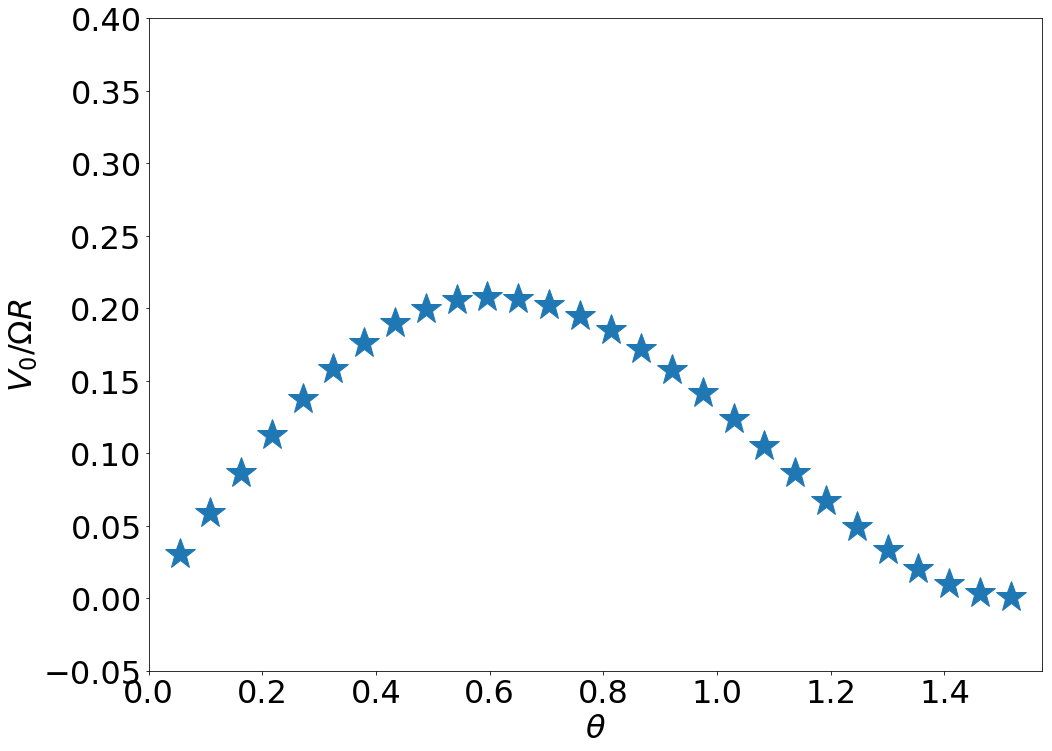

In [9]:
# compare with Liu Bin
#  helical swimming in stokes flow using a novel boundary-element method
#    Fig 5

dir_name = 'compare_Liu/Fig_5_a'
t_dir = os.path.join(PWD, dir_name)
txt_names = glob.glob('./%s/*.txt' % dir_name)

helix_theta = []
helix_velocity = []
for txt_name in txt_names:
    with open(txt_name, 'r') as ftxt:
        FILE_DATA = ftxt.read()
    
    text_headle = 'helix radius: '
    tmp1 = psf.read_array(text_headle, FILE_DATA, array_length=1)
    text_headle = 'helix pitch: '
    tmp2 = psf.read_array(text_headle, FILE_DATA, array_length=1)
    helix_theta.append(np.arctan(2 * np.pi * tmp1 / tmp2))
    
    text_headle = 'Norm forward helix velocity is '
    temp1 = psf.read_array(text_headle, FILE_DATA, array_length=1)
    helix_velocity.append(temp1)

helix_theta = np.hstack(helix_theta)
helix_velocity = np.abs(np.hstack(helix_velocity))

fig = plt.figure(figsize=(16, 12))
ax = fig.subplots(nrows=1, ncols=1)
fig.patch.set_facecolor('white')
ax.plot(helix_theta, helix_velocity, '*', ms=fontsize*0.8)
ax.set_xlabel('$\\theta$', fontsize=fontsize*0.8)
ax.set_ylabel('$V_0/\\Omega R$', fontsize=fontsize*0.8)
ax.set_xlim(0, np.pi/2)
ax.set_ylim(-0.05, 0.4)
plt.xticks(fontsize=fontsize*0.8)
plt.yticks(fontsize=fontsize*0.8)
